# План
1. Алгоритм knn
2. Оценка качества модели
3. Обнаружение переобучения
4. Поиск гиперапарметров

In [1]:
# Импортируем необходимые библиотеки
import numpy as np  # Для работы с массивами и числовыми операциями
from sklearn.datasets import make_classification  # Для генерации случайного набора данных для классификации

# Импортируем функции для разбиения данных на обучающую и тестовую выборки, кросс-валидации и подбора параметров
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# Импортируем классы классификатора и регрессора метода k-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Импортируем метрики для оценки моделей
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt


# Алгоритм knn

## пример для классифкации на двумерных данных

**n_samples=100:** количество выборок в наборе данных, в данном случае 100.  
**n_features=2:** количество признаков (фичей) в наборе данных, в данном случае 2.  
**n_informative=2:** количество информативных признаков, которые действительно влияют на выходные классы, в данном случае 2.  
**n_classes=3:** количество классов, которые необходимо предсказать, в данном случае 3.  
**n_redundant=0:** количество избыточных признаков, которые являются линейными комбинациями информативных признаков, в данном случае 0.  
**n_clusters_per_class=1:** количество кластеров на каждый класс, в данном случае 1.  
**random_state=3:** начальное значение для генератора случайных чисел, чтобы обеспечить воспроизводимость результата.

In [2]:
X,y = make_classification(
          n_samples=100,
          n_features=2,
          n_informative=2,
          n_classes=3,
          n_redundant=0,
          n_clusters_per_class=1,
          random_state=3,
)

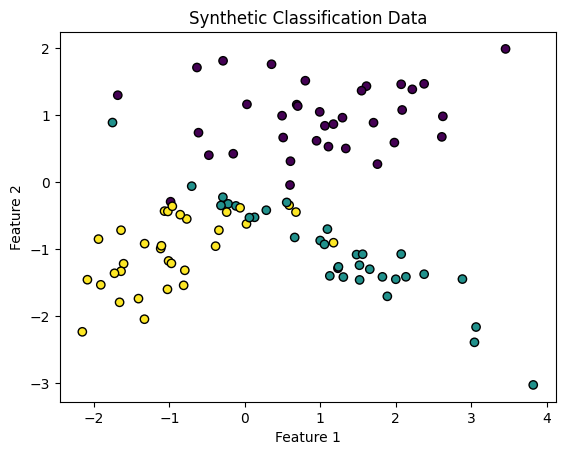

In [3]:

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Data')
plt.show()

In [4]:
#подготовка тестового и тренировочного наборов данных

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [5]:

n_neighbors=10

model_cl = KNeighborsClassifier(n_neighbors = n_neighbors)
model_cl.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Команда `%%time` измеряет время выполнения кода один раз.
Она возвращает общее время выполнения кода, включая время процессора (CPU time) и реальное время (Wall time).

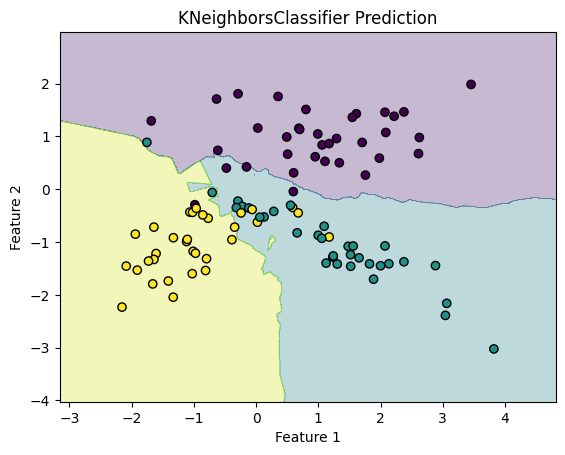

CPU times: user 42 s, sys: 1.05 s, total: 43.1 s
Wall time: 1min 15s


In [6]:
%%time
# Построение сетки точек.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Создаем все возможные комбинации точек x, y
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# flatten() - для преобразования их в одномерные массивы.
# np.c_ - используется для объединения массивов вдоль второй оси (в случае двумерных массивов это столбцы)
# Прогнозирование классов для каждой точки сетки
pred = model_cl.predict(np.c_[xx.flatten(), yy.flatten()])
pred = pred.reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, pred, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNeighborsClassifier Prediction')
plt.show()

## Оценка качества модели

In [7]:
y_train_pred = model_cl.predict(X_train)
y_test_pred = model_cl.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Вычисление метрик
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


In [9]:
accuracy_train, accuracy_test

(0.875, 0.85)

In [10]:
conf_matrix_train, conf_matrix_test

(array([[25,  3,  0],
        [ 0, 24,  1],
        [ 0,  6, 21]]),
 array([[6, 1, 1],
        [1, 6, 0],
        [0, 0, 5]]))

## пример для регрессии на двумерных данных

In [11]:
# Создание синтетического набора данных
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 точек в 2D пространстве
y = np.sin(X) + np.cos(X) + np.random.randn(100, 1) * 0.1  # Зависимая переменная

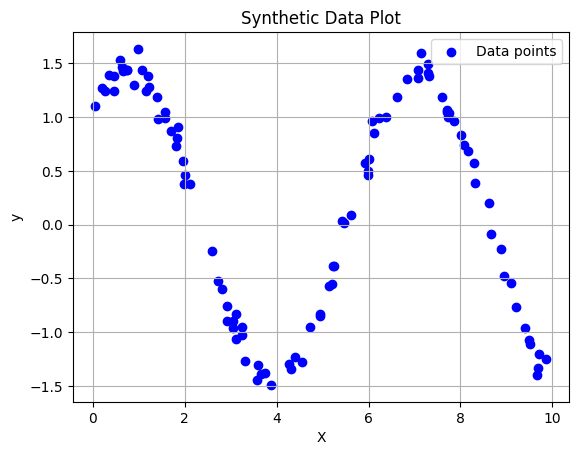

In [12]:
# Преобразуем X и y в одномерные массивы для построения графика
X_reshaped = X.flatten()
y_reshaped = y.flatten()

# Построение графика
plt.scatter(X_reshaped, y_reshaped, color='blue', label='Data points')
plt.title('Synthetic Data Plot')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Обучение модели k-NN
model_reg = KNeighborsRegressor(n_neighbors=10)
model_reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10)

In [15]:
# Предсказание на обучающей и тестовой выборках
y_pred_train = model_reg.predict(X_train)
y_pred_test = model_reg.predict(X_test)

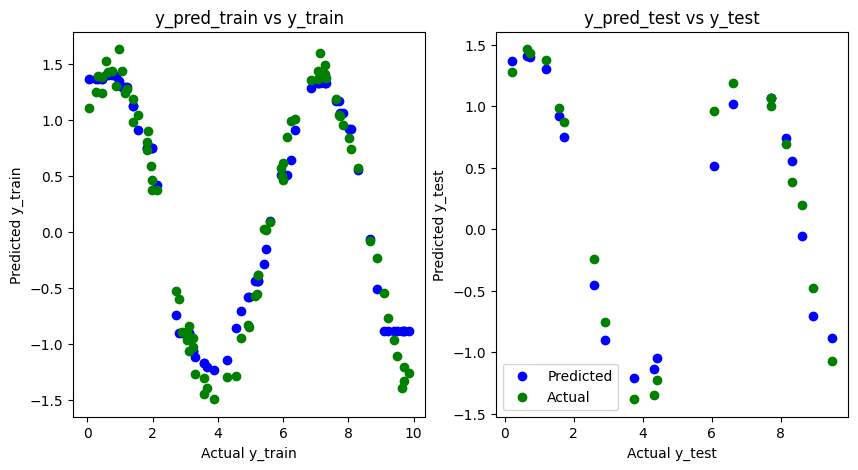

In [16]:
#  Визуализация предсказанных значений против фактических значений для обучающей выборки
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_pred_train, color='blue', label='Predicted')
plt.scatter(X_train, y_train, color='green', label='Actual')
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train')
plt.title('y_pred_train vs y_train')

# Визуализация предсказанных значений против фактических значений для тестовой выборки
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_pred_test, color='blue', label='Predicted')
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.xlabel('Actual y_test')
plt.ylabel('Predicted y_test')
plt.title('y_pred_test vs y_test')

plt.legend()
plt.show()

## Оценка качества модели

In [17]:

# Вычисление метрик
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)


# Вычисление метрик
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)



In [18]:
mae_train, mae_test

(0.14918951156291796, 0.14771943484122524)

In [19]:
mse_train, mse_test

(0.03658034034228753, 0.031212253299326382)

In [20]:
rmse_train, rmse_test

(0.19125987645684478, 0.17666989924524887)

In [21]:
r2_train, r2_test

(0.9654575682215031, 0.9684566039020744)

# Кросс валидация

In [22]:
# Определение стратегии кросс-валидации (например, KFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации и вывод результатов
cv_scores = cross_val_score(model_reg, X, y, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cv_scores  # Меняем знак, так как cross_val_score возвращает отрицательное MSE
print("Mean MSE:", mse_scores.mean())
print("Standard deviation of MSE:", mse_scores.std())

Mean MSE: 0.04578668035341985
Standard deviation of MSE: 0.01747564266680468


In [23]:
mse_scores

array([0.03121225, 0.04602666, 0.04914363, 0.02634556, 0.0762053 ])

## Cross val со своей скор функцией

In [24]:
from sklearn.metrics import make_scorer

In [25]:
def smape(y_true, y_pred):
    e = np.abs(y_true - y_pred)
    s = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(e / s) * 100

In [26]:
# ошибка, нужно минимизировать, greater_is_better=False
scorer = make_scorer(smape, greater_is_better=False)

In [27]:
scores = cross_val_score(
    model_reg, X_train, y_train,
    scoring=scorer, n_jobs=-1,
    cv=5
    )
scores

array([-37.85897573, -41.71608975, -22.74312324, -27.56525541,
       -36.63334614])

In [28]:
(-1)*scores.mean()

33.30335805206755

# Как подбирать параметры

In [29]:
# Создание списка значений k, которые вы хотите оценить
k_values = [3, 5, 7, 9, 10, 11, 20]

# Инициализация списка для сохранения средних оценок точности для каждого значения k
mean_scores = []

# Перебор значений k
for k in k_values:
    # Создание модели k-ближайших соседей
    knn = KNeighborsRegressor(n_neighbors=k)

    # Вычисление средней оценки точности с использованием перекрестной проверки
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')  # cv=5 означает 5-кратную перекрестную проверку
    mean_scores.append(np.mean(scores))

# Вывод результатов
for k, score in zip(k_values, mean_scores):
    print("k =", k, "mean_squared_error:", score)


k = 3 mean_squared_error: -0.020023060158833338
k = 5 mean_squared_error: -0.02402529847600053
k = 7 mean_squared_error: -0.028052981146658405
k = 9 mean_squared_error: -0.03839184442287952
k = 10 mean_squared_error: -0.04745154550448168
k = 11 mean_squared_error: -0.05922992091888506
k = 20 mean_squared_error: -0.21418521697048915


In [30]:
param_grid={
    'n_neighbors': range(2,10,2),
    'p': [1,2],
}
model = KNeighborsRegressor()
gs_knn = GridSearchCV(model, param_grid=param_grid,
                       scoring=scorer, n_jobs=-1, cv=5)
gs_knn.fit(X_train, y_train)


print(f'Гиперпараметры лучшей модели: {gs_knn.best_params_}')
print(f'Значение SMAPE: {-1 * gs_knn.best_score_}')

Гиперпараметры лучшей модели: {'n_neighbors': 2, 'p': 1}
Значение SMAPE: 18.812653398320887
